<a href="https://colab.research.google.com/github/jasmineA20/psychic-broccoli/blob/main/SIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad


#Fit parameters
k     = 0.08617
delta = 1
T     = 1.38
gamma = 0.05
beta  = 1/(k*T)

In [41]:
def z(e):
  return e - gamma * 1.0j

In [42]:
#Define Functions

#BCS DOS
# with gaussian
def N(e):
    return np.abs(np.real(z(e)/np.sqrt(z(e)**2 - delta**2)))


def f(e):
    return 1/(1 + np.exp(beta))



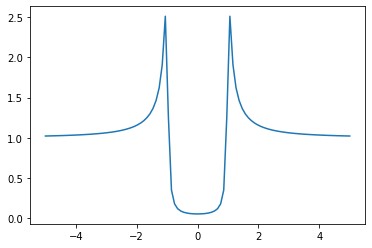

In [43]:
n    = np.vectorize(N)
eval = np.linspace(-5,5,100)

#BCS density of states plot
#print(n(eval,delta,gamma))
plt.plot(eval,n(eval))
plt.show()



In [102]:
def fp(e):
    return -1*(1/(k*T))*np.exp(-e/(k*T))/((1+np.exp(-e/(k*T)))**2)

In [105]:
def integrand(e,v,delta):
  return np.abs(N(e,delta)*fp(e-v))

In [106]:
xmin = -5
xmax =  5 
v    = np.linspace(xmin,xmax,100)
didvr = [[],[],[]]

for a in v : 
  didvr[0].append(quad(integrand,delta,a+5,args = (a,delta),limit=100)[0])


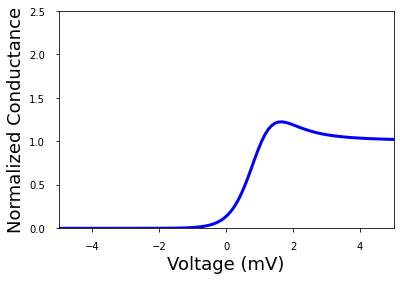

In [110]:
plt.figure(1)

plt.axis([xmin,xmax,0,2.5])
plt.xlabel("Voltage (mV)",fontsize=18)
plt.ylabel("Normalized Conductance",fontsize=18)
plt.plot(v,didvr[0],color="blue",linewidth=3)
plt.tick_params(axis='y',pad=10)
plt.tick_params(axis='x',pad=10)

#a = plt.axes([.53,.16,.34,.34],facecolor='#ededed')

**From the Proximity model**

In [81]:
Delta = 1.38
k = 0.08617
T = 4.2

In [82]:
def N(e,Delta):
    return e/np.sqrt(e**2-Delta**2+0j)

#Fermi-Dirac Distribution
def f(e):
    return 1/(1+np.exp(-e/(k*T)))

def fp(e):
    return -1*(1/(k*T))*np.exp(-e/(k*T))/((1+np.exp(-e/(k*T)))**2)


def bcsintgnd(e,v,Delta):
    return np.abs(N(e,Delta))*(-fp(e-v))

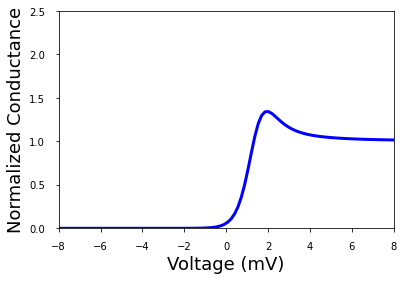

In [111]:
xmin    = -8
xmax    = 8

vr      = np.linspace(xmin,xmax,100)#200
didvr   = [[],[],[]]
cutoff  = 5

for v in vr:
    didvr[0].append(quad(bcsintgnd,Delta,v+cutoff,args=(v,Delta),limit=100)[0])

plt.figure(1)

plt.axis([xmin,xmax,0,2.5])
plt.xlabel("Voltage (mV)",fontsize=18)
plt.ylabel("Normalized Conductance",fontsize=18)
plt.plot(vr,didvr[0],color="blue",linewidth=3)
plt.tick_params(axis='y',pad=10)
plt.tick_params(axis='x',pad=10)

#a = plt.axes([.53,.16,.34,.34],facecolor='#ededed')

In [86]:
#Functions from the Proximity Model DOS
def Omega(e,Delta):
    return np.sqrt(e**2-Delta**2+0j)

def F(e):
    return (e**2 - DeltaS*DeltaN)/(Omega(e,DeltaN)*Omega(e,DeltaS))

def G(e):
    return e*(DeltaS-DeltaN)/(Omega(e,DeltaN)*Omega(e,DeltaS))

def DKd(e,dl,R):
    return R*Omega(e,DeltaN)+dl*1j

def sigma(e,dl,R):
    return np.imag( ((e/Omega(e,DeltaN))*( F(e)*np.cos(DKd(e,dl,R))*1j + np.sin(DKd(e,dl,R)) )+1j*G(e)*DeltaN/Omega(e,DeltaN))/(np.cos(DKd(e,dl,R)) - F(e)*np.sin(DKd(e,dl,R))*1j) )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Per

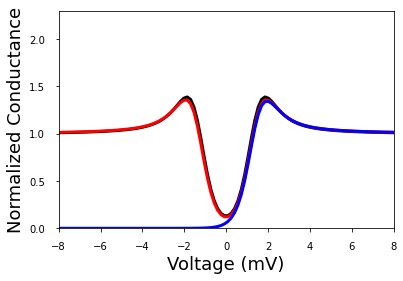

In [112]:
vr = np.linspace(xmin,xmax,100)#200
didvr = [[],[],[]]
cutoff=5
for v in vr:
    didvr[0].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,Rhigh),limit=100)[0])
    didvr[1].append(quad(intgnd,v-cutoff,v+cutoff,args=(v,dl,Rlow),limit=100)[0])
    didvr[2].append(quad(bcsintgnd,DeltaS,v+cutoff,args=(v,DeltaS),limit=100)[0])

plt.figure(1)

plt.axis([xmin,xmax,0,2.3])
plt.xlabel("Voltage (mV)",fontsize=18)
plt.ylabel("Normalized Conductance",fontsize=18)
plt.plot(vr,didvr[0],color="black",linewidth=3)
plt.plot(vr,didvr[1],color="red",linewidth=3)
plt.plot(vr,didvr[2],color="blue",linewidth=3)
plt.tick_params(axis='y',pad=10)
plt.tick_params(axis='x',pad=10)
